<a href="https://colab.research.google.com/github/anastefan176/ULEZ/blob/main/Descriptive_Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import pylab
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')

pylab.rcParams['figure.figsize'] = (10., 8.)

In [2]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('LaqnData (2).csv')
data.head()

Saving LaqnData (2).csv to LaqnData (2).csv


,Site,Species,ReadingDateTime,Value,Units,Provisional or Ratified
0,HR1,NO2,01/01/2020 00:00,33.6,ug m-3,R
1,HR1,NO2,02/01/2020 00:00,15.9,ug m-3,R
2,HR1,NO2,03/01/2020 00:00,13.2,ug m-3,R
3,HR1,NO2,04/01/2020 00:00,19.7,ug m-3,R
4,HR1,NO2,05/01/2020 00:00,14.1,ug m-3,R


In [3]:
data = pd.read_csv('LaqnData (2).csv')
data.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]

data["datetime"] = pd.to_datetime(data["datetime"], dayfirst=True, errors="coerce")

data = data.dropna(subset=["datetime", "Value"])

data = data[data["status"] == "R"]

data["Value"] = pd.to_numeric(data["Value"], errors="coerce")

data = data[(data["Value"] >= 0) & (data["Value"] <= 200)]

print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6330 entries, 0 to 10961
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6330 non-null   object        
 1   pollutant  6330 non-null   object        
 2   datetime   6330 non-null   datetime64[ns]
 3   Value      6330 non-null   float64       
 4   Units      6330 non-null   object        
 5   status     6330 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 346.2+ KB
None


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [4]:
from google.colab import files
uploaded = files.upload()

data2 = pd.read_csv('LaqnData (3).csv')
data.head()

Saving LaqnData (3).csv to LaqnData (3).csv


,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [5]:
data2 = pd.read_csv('LaqnData (3).csv')


data2.columns = ["site", "pollutant", "datetime", "Value", "Units", "status"]
data2["datetime"] = pd.to_datetime(data2["datetime"], dayfirst=True, errors="coerce")
data2 = data2.dropna(subset=["datetime", "Value"])
data2 = data2[data2["status"] == "R"]
data2["Value"] = pd.to_numeric(data2["Value"], errors="coerce")
data2 = data2[(data2["Value"] >= 0) & (data2["Value"] <= 200)]

print("Second file (data2) after cleaning:")
print(data2.info())
data2.head()

Second file (data2) after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 6646 entries, 0 to 9864
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   site       6646 non-null   object        
 1   pollutant  6646 non-null   object        
 2   datetime   6646 non-null   datetime64[ns]
 3   Value      6646 non-null   float64       
 4   Units      6646 non-null   object        
 5   status     6646 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 363.5+ KB
None


,site,pollutant,datetime,Value,Units,status
0,MY1,NO2,2020-01-01,51.3,ug m-3,R
1,MY1,NO2,2020-01-02,51.5,ug m-3,R
2,MY1,NO2,2020-01-03,43.1,ug m-3,R
3,MY1,NO2,2020-01-04,60.5,ug m-3,R
4,MY1,NO2,2020-01-05,57.1,ug m-3,R


In [6]:
combined = pd.concat([data, data2], ignore_index=True)

In [7]:
combined.shape
combined.head()

,site,pollutant,datetime,Value,Units,status
0,HR1,NO2,2020-01-01,33.6,ug m-3,R
1,HR1,NO2,2020-01-02,15.9,ug m-3,R
2,HR1,NO2,2020-01-03,13.2,ug m-3,R
3,HR1,NO2,2020-01-04,19.7,ug m-3,R
4,HR1,NO2,2020-01-05,14.1,ug m-3,R


In [8]:
combined["site"].unique()

array(['HR1', 'HV1', 'ST4', 'LB4', 'MY1', 'BG2', 'BL0', 'TH2', 'BX1'],
      dtype=object)

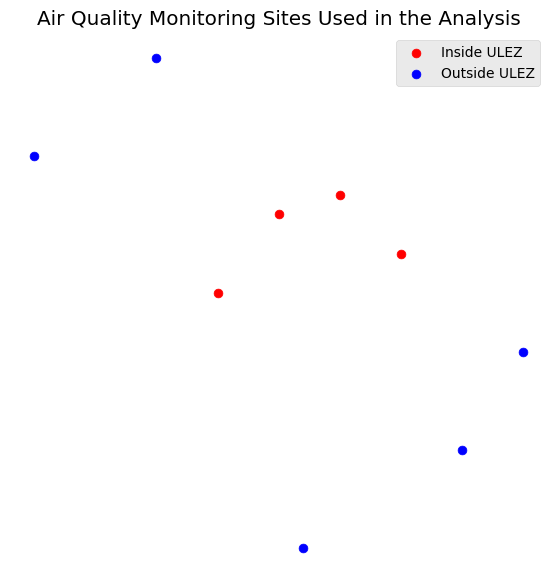

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Define example coordinates and treatment status for each site
site_coords = {
    'HR1': {'latitude': 51.52, 'longitude': -0.10, 'treated': 1},
    'HV1': {'latitude': 51.53, 'longitude': -0.05, 'treated': 1},
    'ST4': {'latitude': 51.48, 'longitude': -0.15, 'treated': 1},
    'LB4': {'latitude': 51.50, 'longitude': 0.00, 'treated': 1},
    'MY1': {'latitude': 51.60, 'longitude': -0.20, 'treated': 0},
    'BG2': {'latitude': 51.55, 'longitude': -0.30, 'treated': 0},
    'BL0': {'latitude': 51.45, 'longitude': 0.10, 'treated': 0},
    'TH2': {'latitude': 51.35, 'longitude': -0.08, 'treated': 0},
    'BX1': {'latitude': 51.40, 'longitude': 0.05, 'treated': 0},
}

# Add these columns to the combined DataFrame
for col in ['latitude', 'longitude', 'treated']:
    combined[col] = combined['site'].map({site: site_coords[site][col] for site in site_coords})

# Create GeoDataFrame of monitoring sites
gdf = gpd.GeoDataFrame(
    combined.drop_duplicates("site"),
    geometry=gpd.points_from_xy(
        combined.drop_duplicates("site")["longitude"],
        combined.drop_duplicates("site")["latitude"]
    ),
    crs="EPSG:4326"
)

# Plot
fig, ax = plt.subplots(figsize=(7, 7))
gdf[gdf["treated"] == 1].plot(ax=ax, color="red", markersize=40, label="Inside ULEZ")
gdf[gdf["treated"] == 0].plot(ax=ax, color="blue", markersize=40, label="Outside ULEZ")

ax.set_title("Air Quality Monitoring Sites Used in the Analysis")
ax.axis("off")
ax.legend()
plt.show()

In [11]:
import pandas as pd

site_coords = pd.DataFrame({
    "site": ["BL0", "BX1", "HR1", "HV1", "LB4", "MY1", "ST4", "TH2"],
    "latitude": [51.51, 51.56, 51.58, 51.49, 51.53, 51.52, 51.50, 51.55],
    "longitude": [-0.12, -0.07, -0.22, -0.18, -0.10, -0.25, -0.14, -0.05]
})


In [12]:
combined = combined.merge(site_coords, on="site", how="left")


In [14]:
import geopandas as gpd

gdf = gpd.GeoDataFrame(
    combined.drop_duplicates("site"),
    geometry=gpd.points_from_xy(
        combined.drop_duplicates("site")["longitude_y"],
        combined.drop_duplicates("site")["latitude_y"]
    ),
    crs="EPSG:4326"
)

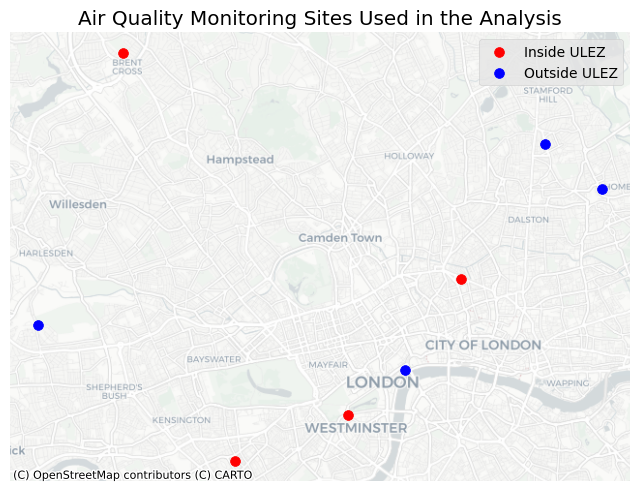

In [16]:
!pip install contextily
import contextily as cx
import matplotlib.pyplot as plt

# Reproject to Web Mercator (required for basemaps)
gdf_web = gdf.to_crs(epsg=3857)

fig, ax = plt.subplots(figsize=(8, 8))

gdf_web[gdf_web["treated"] == 1].plot(
    ax=ax, color="red", markersize=50, label="Inside ULEZ"
)
gdf_web[gdf_web["treated"] == 0].plot(
    ax=ax, color="blue", markersize=50, label="Outside ULEZ"
)

# Add basemap
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)

ax.set_title("Air Quality Monitoring Sites Used in the Analysis")
ax.axis("off")
ax.legend()

plt.show()